In [36]:
import pandas as pd
from rdkit import Chem
from rdkit import RDLogger
import seaborn as sns

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [35]:
mtor = pd.read_csv(
    '../data/chembl_mtor_ic50.csv',
    # on_bad_lines='skip',
    sep=';'
    )
mtor

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1773577,NaN,0,443.49,0.0,3.65,40,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
1,CHEMBL1773561,NaN,0,390.47,0.0,4.60,24,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
2,CHEMBL1773077,NaN,0,406.47,0.0,4.30,25,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
3,CHEMBL1773580,NaN,0,443.49,0.0,3.65,43,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
4,CHEMBL1773578,NaN,0,457.51,0.0,3.68,41,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,CHEMBL4287809,NaN,0,426.43,0.0,2.71,14,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN
4592,CHEMBL4280265,NaN,0,448.84,0.0,3.49,27,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN
4593,CHEMBL4246563,NaN,0,407.43,0.0,4.92,16b,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4229497,1,Scientific Literature,Bioorg Med Chem,2018,NaN
4594,CHEMBL4244147,NaN,0,381.44,0.0,1.49,3c,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4229417,1,Scientific Literature,Bioorg Med Chem,2018,NaN


In [52]:
drugbanksdf = Chem.SDMolSupplier('../data/drugbank.sdf')
data = []
for mol in drugbanksdf:
    if mol is not None:
        props = mol.GetPropsAsDict()
        data.append(props)

# Create DataFrame
drugbank = pd.DataFrame(data)

In [34]:
drugbank

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_AVERAGE_POLARIZABILITY,...,JCHEM_VEBER_RULE,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,PRODUCTS,SALTS,SYNONYMS,INTERNATIONAL_BRANDS,JCHEM_ATOM_COUNT
0,DB00006,drugbank,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,OIRCOABEOLEUMC-GEJPAHFPSA-N,C98H138N24O33,2180.2853,2178.985813,37.0,215.455603,...,0.0,DB00006,BTD00076; BIOD00076,approved; investigational,Bivalirudin,Angiomax; Bivalirudin; Bivalirudin for Injection,NaN,NaN,NaN,NaN
1,DB00014,drugbank,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,BLCLNMBMMGCOAS-URPVMXJPSA-N,C59H84N18O14,1269.4105,1268.641439,18.0,131.221183,...,0.0,DB00014,BTD00113; BIOD00113,approved,Goserelin,Zoladex; Zoladex Inj Depot 3.6mg; Zoladex LA I...,Goserelin acetate,NaN,NaN,NaN
2,DB00035,drugbank,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,NFLWUMRGJYTJIN-NXBWRCJVSA-N,C46H64N14O12S2,1069.2170,1068.426955,15.0,106.194314,...,0.0,DB00035,BTD00112; BTD00061; BIOD00112; BIOD00061,approved,Desmopressin,Apo-desmopressin; Ddavp; Ddavp Inj 4mcg/ml; Dd...,Desmopressin acetate; Desmopressin acetate tri...,1-(3-mercaptopropionic acid)-8-D-arginine-vaso...,Adiuretin; DesmoMelt,NaN
3,DB00050,drugbank,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,InChI=1S/C70H92ClN17O14/c1-39(2)31-52(61(94)82...,SBNPWPIBESPSIF-MHWMIDJBSA-N,C70H92ClN17O14,1431.0380,1429.669818,18.0,148.090400,...,0.0,DB00050,BTD00115; APRD00686; BIOD00115,approved; investigational,Cetrorelix,Cetrotide,Cetrorelix Acetate,Cetrorelixum,NaN,NaN
4,DB00091,drugbank,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...,PMATZTZNYRCHOR-CGLBZJNRSA-N,C62H111N11O12,1202.6350,1201.841368,12.0,133.601326,...,0.0,DB00091,BTD00003; BIOD00003,approved; investigational; vet_approved,Cyclosporine,Apo-cyclosporine Oral Solution; Cyclosporine; ...,NaN,Ciclosporin; Ciclosporina; Ciclosporine; Ciclo...,Sangcya,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,DB13154,drugbank,OC1=CC=C(Cl)C=C1,"InChI=1S/C6H5ClO/c7-5-1-3-6(8)4-2-5/h1-4,8H",WXNZTHHGJRFXKQ-UHFFFAOYSA-N,C6H5ClO,128.5560,128.002892,1.0,12.024294,...,1.0,DB13154,NaN,approved,Parachlorophenol,Camphorated Para Chlorophenol Liq; Caustinerf;...,NaN,4-Chlorophenol; 4-chlorphenol; p-Chlorophenol,NaN,NaN
7116,DB13155,drugbank,OC[C@H]1O[C@@H](OC2=C(O)C=C3OC(=O)C=CC3=C2)[C@...,InChI=1S/C15H16O9/c16-5-10-12(19)13(20)14(21)1...,XHCADAYNFIFUHF-TVKJYDDYSA-N,C15H16O9,340.2840,340.079432,8.0,31.397460,...,0.0,DB13155,NaN,approved,Esculin,Proctol Ointment; Proctol Suppositories; Proct...,Esculin sodium,6-(beta-D-Glucopyranosyloxy)-7-hydroxy-2H-1-be...,NaN,40.0
7117,DB13156,drugbank,C[C@@H](O)CN(C)C.C[C@@H](O)CN(C)C.C[C@@H](O)CN...,InChI=1S/C10H12N4O5.3C9H9NO3.3C5H13NO/c15-1-4-...,YLDCUKJMEKGGFI-KSIULYHRSA-N,C52H78N10O17,1115.2490,1114.554641,7.0,24.600758,...,0.0,DB13156,NaN,approved,Inosine pranobex,Imunovir; Isoprinosine; Isoprinosine Tab 500mg,NaN,IAD; Inosine acedobene dimepranol; Inosine-2-h...,NaN,157.0
7118,DB13157,drugbank,[Na+].CCCCCCCCCCCCOC(=O)CS([O-])(=O)=O,InChI=1S/C14H28O5S.Na/c1-2-3-4-5-6-7-8-9-10-11...,UAJTZZNRJCKXJN-UHFFFAOYSA-M,C14H27NaO5S,330.4100,330.147689,4.0,34.946224,...,0.0,DB13157,NaN,experimental,Sodium lauryl sulfoacetate,Microlax Micro Enema; Microlax Micro-enema,NaN,Lathanol; Lathanol LAL; Sulfoacetic acid dodec...,NaN,48.0


In [30]:
# my favourite target
rhk = pd.read_csv('../data/rhodopsin_kinase.csv', sep=';', on_bad_lines='skip')
rhk

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan,Records Key,Records Name
0,CHEMBL475251,R-406,R-406|R940406|TAMATINIB,Small molecule,2.0,470.46,519,1014,3.63,128.75,...,-0.63,NEUTRAL,C22H23FN6O5,COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)...,NHHQJBCNYHBUSI-UHFFFAOYSA-N,InChI=1S/C22H23FN6O5/c1-22(2)20(30)28-19-13(34...,False,0,"['5, R-406', 'R406', '1, R406', 'SID99460878',...","['6-(5-fluoro-2-(3,4,5-trimethoxyphenylamino)p..."
1,CHEMBL384304,RG-547,R 547|R-547|RG-547|RO 4584820|RO-4584820|RO458...,Small molecule,2.0,441.46,460,1688,1.41,127.51,...,-1.62,NEUTRAL,C18H21F2N5O4S,COc1ccc(F)c(F)c1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)C...,JRNJNYBQQYBCLE-UHFFFAOYSA-N,InChI=1S/C18H21F2N5O4S/c1-29-13-4-3-12(19)15(2...,False,0,"['R547', '39, R547', 'SID174007020', 'R-547', ...","['R547', '[4-amino-2-(1-methanesulfonylpiperid..."
2,CHEMBL553,ERLOTINIB,"CP-358,774|CP-358774|CP-35877401|ERLOTINIB|Erl...",Small molecule,4.0,393.44,1241,5460,3.41,74.73,...,-1.22,NEUTRAL,C22H23N3O4,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,AAKJLRGGTJKAMG-UHFFFAOYSA-N,InChI=1S/C22H23N3O4/c1-4-16-6-5-7-17(12-16)25-...,False,0,"['Tarceva', 'Tarceva', 'Erlotinib', 'Erlotinib...","['[6,7-Bis-(2-methoxy-ethoxy)-quinazolin-4-yl]..."
3,CHEMBL445813,AT-7519,AT 7519|AT-7519|AT7519|CDKI AT7519,Small molecule,2.0,382.25,518,938,2.45,98.91,...,-1.47,BASE,C16H17Cl2N5O2,O=C(NC1CCNCC1)c1n[nH]cc1NC(=O)c1c(Cl)cccc1Cl,OVPNQJVDAFNBDN-UHFFFAOYSA-N,InChI=1S/C16H17Cl2N5O2/c17-10-2-1-3-11(18)13(1...,False,0,"['AT-7519', 'SID137275935', 'SID137275934', 'A...","['AT-7519', 'SID137275935', 'SID137275934', 'A..."
4,CHEMBL296468,BMS-387032,BMS-387032|BMS387032|SNS 032|SNS-032,Small molecule,1.0,380.54,514,3050,3.66,80.05,...,-1.68,BASE,C17H24N4O2S2,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,OUSFTKFNBAZUKL-UHFFFAOYSA-N,"InChI=1S/C17H24N4O2S2/c1-17(2,3)12-8-19-13(23-...",False,0,"['21', 'BMS-387032/SNS-032', '1, SNS-032', '1,...",['Piperidine-4-carboxylic acid [5-(5-tert-buty...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,CHEMBL513909,BI-2536,BI 2536|BI-2536|BI2536,Small molecule,2.0,521.67,882,2281,3.56,102.93,...,-1.08,BASE,C28H39N7O3,CC[C@@H]1C(=O)N(C)c2cnc(Nc3ccc(C(=O)NC4CCN(C)C...,XQVVPGYIWAGRNI-JOCHJYFZSA-N,InChI=1S/C28H39N7O3/c1-5-22-27(37)34(3)23-17-2...,False,0,"['BI-2536', '1', 'BI-2536', 'BI 2536, BI 2356'...","['BI-2536', '(R)-4-(8-cyclopentyl-7-ethyl-5-me..."
361,CHEMBL941,IMATINIB,GLAMOX|Gleevec|IMATINIB|Imatinib|NSC-743414|NS...,Small molecule,4.0,493.62,1345,4566,4.59,86.28,...,-1.80,NEUTRAL,C29H31N7O,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,KTUFNOKKBVMGRW-UHFFFAOYSA-N,InChI=1S/C29H31N7O/c1-21-5-10-25(18-27(21)34-2...,False,0,"['STI571, Gleevec', '4', 'STI-571 imatinib', '...","['Imatinib', 'imatinib', '4-(4-Methyl-piperazi..."
362,CHEMBL3651966,LGH-447,LGH-447|LGH447|NVP-LGH477|PIM 447|PIM KINASE I...,Small molecule,1.0,440.47,407,729,5.04,80.90,...,-0.64,BASE,C24H23F3N4O,C[C@@H]1C[C@H](N)C[C@H](c2ccncc2NC(=O)c2ccc(F)...,VRQXRVAKPDCRCI-ZNMIVQPWSA-N,InChI=1S/C24H23F3N4O/c1-13-9-14(11-15(28)10-13...,False,0,"['BDBM106870', '1c; PIM447', 'PIM447', 'LGH-44...","['US8592455, 70', 'N-(4-((1R,3S,5S)-3-amino-5-..."
363,CHEMBL1950289,TANZISERTIB,CC-930|JNK 930|JNK-930|JNK930|TANZISERTIB|Tanz...,Small molecule,2.0,448.45,489,856,3.66,97.12,...,-0.89,NEUTRAL,C21H23F3N6O2,O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C...,IBGLGMOPHJQDJB-IHRRRGAJSA-N,InChI=1S/C21H23F3N6O2/c22-11-7-15(23)18(16(24)...,False,0,"['TANZISERTIB', '1, CC-930', 'Tanzisertib', 'T...","['TANZISERTIB', 'trans-4-(9-((S)-tetrahydrofur..."


## Compare mtor cmpds to drugbank cmpds, create plots

In [37]:
from rdkit.Chem import Descriptors

In [49]:
mw_mtor = [Descriptors.MolWt(Chem.MolFromSmiles(smi)) for smi in mtor["Smiles"] if smi is not None]

In [50]:
mw_db = [Descriptors.MolWt(Chem.MolFromSmiles(smi)) for smi in drugbank["SMILES"] if smi is not None]

TypeError: No registered converter was able to produce a C++ rvalue of type std::__cxx11::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float

In [56]:
db_mol = [mol for mol in drugbanksdf if mol]
mw_db = [Descriptors.MolWt(mol) for mol in db_mol]

/tmp/ipykernel_26215/1443215584.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt_mw.set(xticklabels=['mtor', 'drugbank'], title='Molecular weight')


[[Text(0, 0, 'mtor'), Text(1, 0, 'drugbank')],
 Text(0.5, 1.0, 'Molecular weight')]

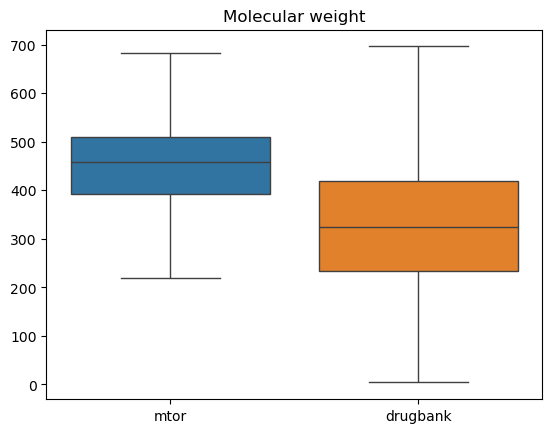

In [67]:
plt_mw = sns.boxplot([mw_mtor, mw_db], showfliers=False)
plt_mw.set(xticklabels=['mtor', 'drugbank'], title='Molecular weight')

In [70]:
db_hba = [Descriptors.NumHAcceptors(mol) for mol in db_mol]
mtor_hba = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(smi)) for smi in mtor["Smiles"] if smi is not None]

db_hbd = [Descriptors.NumHDonors(mol) for mol in db_mol]
mtor_hbd = [Descriptors.NumHDonors(Chem.MolFromSmiles(smi)) for smi in mtor["Smiles"] if smi is not None]

/tmp/ipykernel_26215/2707209792.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt_hba.set(xticklabels=['mtor_hba', 'drugbank_hba', 'mtor_hbd', 'drugbank_hbd'], title='H-bond donors/acceptors')


[[Text(0, 0, 'mtor_hba'),
  Text(1, 0, 'drugbank_hba'),
  Text(2, 0, 'mtor_hbd'),
  Text(3, 0, 'drugbank_hbd')],
 Text(0.5, 1.0, 'H-bond donors/acceptors')]

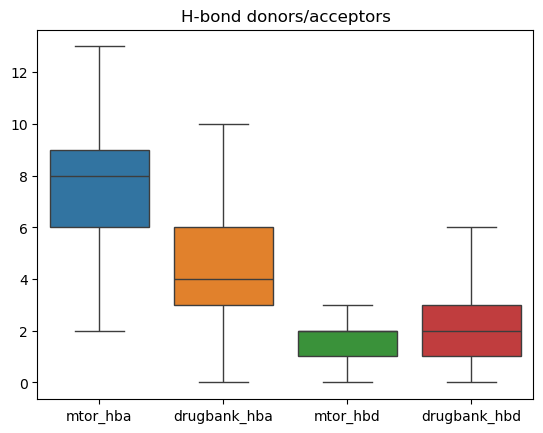

In [71]:
plt_hba = sns.boxplot([mtor_hba, db_hba, mtor_hbd, db_hbd], showfliers=False)
plt_hba.set(xticklabels=['mtor_hba', 'drugbank_hba', 'mtor_hbd', 'drugbank_hbd'], title='H-bond donors/acceptors')

/tmp/ipykernel_26215/4258829557.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt_logp.set(xticklabels=['mtor', 'drugbank'], title='LogP')


[[Text(0, 0, 'mtor'), Text(1, 0, 'drugbank')], Text(0.5, 1.0, 'LogP')]

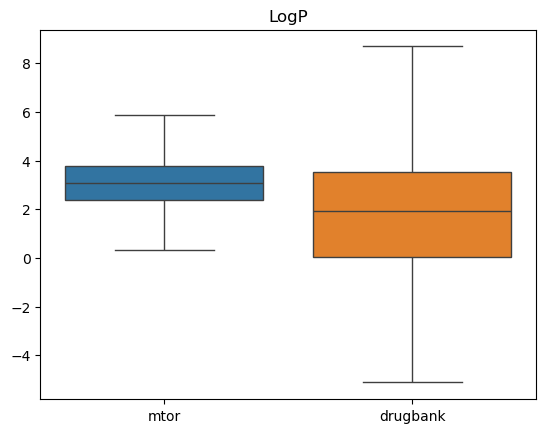

In [72]:
db_logp = [Descriptors.MolLogP(mol) for mol in db_mol]
mtor_logp = [Descriptors.MolLogP(Chem.MolFromSmiles(smi)) for smi in mtor["Smiles"] if smi is not None]

plt_logp = sns.boxplot([mtor_logp, db_logp], showfliers=False)
plt_logp.set(xticklabels=['mtor', 'drugbank'], title='LogP')

[Text(0.5, 0, 'Molecular Weight'),
 Text(0, 0.5, 'LogP'),
 Text(0.5, 1.0, 'Molecular Weight vs LogP')]

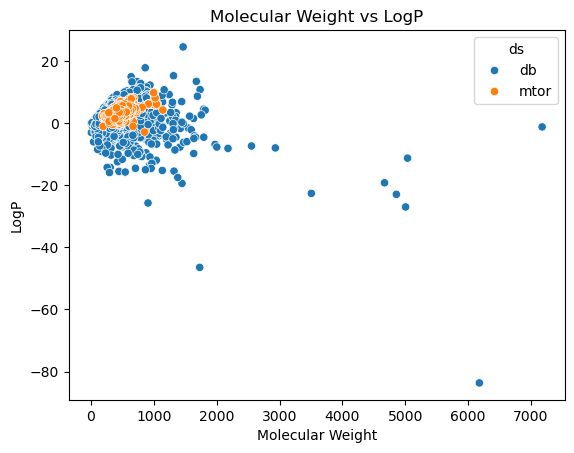

In [78]:
# Check if logp and mw are correlated
db_df = pd.DataFrame({'mw': mw_db, 'logp': db_logp, 'ds': 'db'})
mtor_df = pd.DataFrame({'mw': mw_mtor, 'logp': mtor_logp, 'ds': 'mtor'})
df = pd.concat([db_df, mtor_df])

plt = sns.scatterplot(data =df, x="mw", y='logp', hue='ds')
plt.set(xlabel='Molecular Weight', ylabel='LogP', title='Molecular Weight vs LogP')